# Ensemble Methods

This Jupyter Notebook is dedicated to understanding and implementing ensemble methods for soccer data. You can find the dataset [2022-2023 Soccer Player Stats Dataset](https://www.kaggle.com/datasets/vivovinco/20222023-football-player-stats?resource=download).

The following packages are required to run the attached code:

- [Matplotlib.pylab](https://matplotlib.org/2.0.2/api/pyplot_api.html)

- [Numpy](https://numpy.org/doc/)

- [Seaborn](https://seaborn.pydata.org/)

- [Pandas](https://pandas.pydata.org/docs/)

- [SciKit Learn](https://scikit-learn.org/stable/)


## Description of the Algoirthm:

***
### **Ensemble methods:**

Ensemble methods in machine learning are techniques that combine multiple individual models to produce a stronger predictive model.

The idea is that by aggregating the predictions of multiple models, you can often achieve better performance than any single model could achieve on its own.

There are some popular ensemble methods include Hard Voting, Bagging, and Random Forests.

**Hard Voting:**
- In hard voting, multiple machine learning models are trained independently on the same dataset. When making predictions, each model gets a vote, and the final prediction is determined by a simple majority vote among all the models.
- This approach is particularly effective when the models in the ensemble are diverse and make different types of errors.

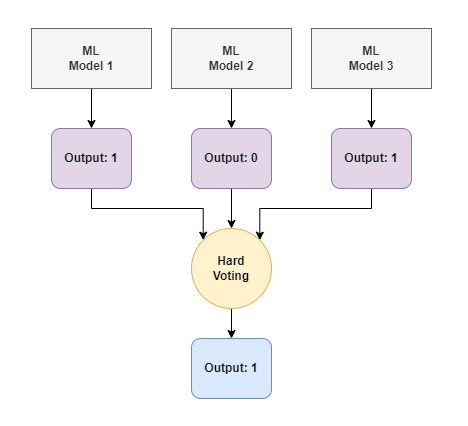

**Bagging (Bootstrap Aggregating):**
- Bagging is a technique that involves training multiple instances of the same learning algorithm on different subsets of the training data.
- These subsets are created by sampling the training data with replacement, meaning that some instances may be repeated in each subset while others may not appear at all.
- Once the models are trained, their predictions are aggregated typically by averaging for regression tasks or by voting for classification tasks. Bagging helps to reduce overfitting and variance, especially for unstable models.

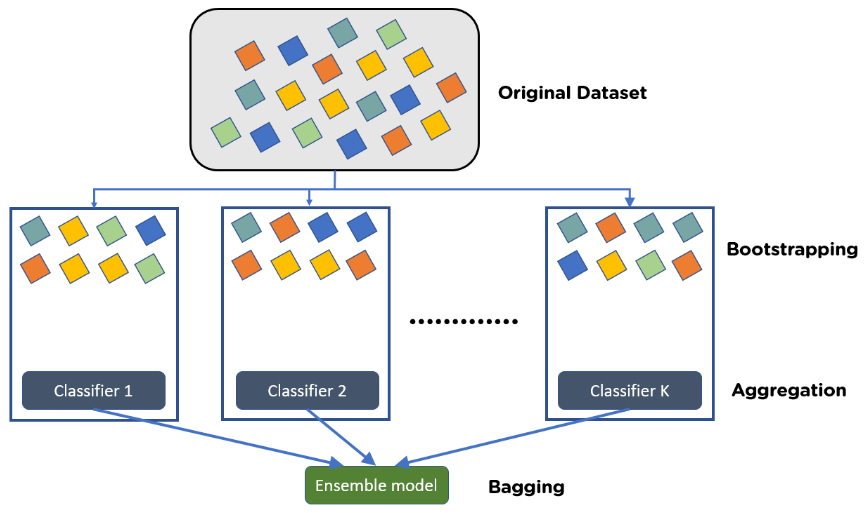

**Random Forests:**
- Random Forests is a specific ensemble method based on decision trees. It builds multiple decision trees during training, each on a random subset of the predictors in the training data.
- The final prediction is made by aggregating the predictions of all the individual trees, typically by averaging (for regression) or voting (for classification).
- Random Forests introduce randomness not only in the selection of the data samples but also in the selection of features for each split in the tree-building process. This randomness helps to decorrelate the individual trees, reducing the overall variance of the model and improving generalization performance.

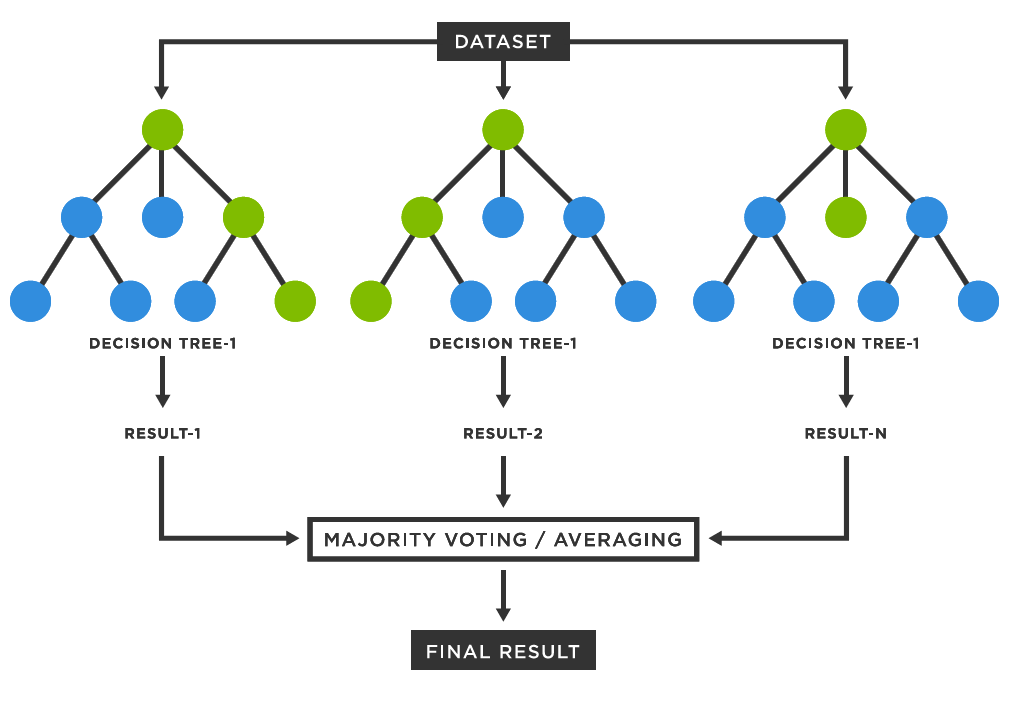

Image 1 source: [Medium](https://ilyasbinsalih.medium.com/what-is-hard-and-soft-voting-in-machine-learning-2652676b6a32).

Image 2 source: [SimpliLearn](https://www.simplilearn.com/tutorials/machine-learning-tutorial/bagging-in-machine-learning).

Image 3 source: [Medium](https://medium.com/@denizgunay/random-forest-af5bde5d7e1e).
***

## Setting Up:

***
Import the necessary modules.
***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split

***
Import and prepare classification data.
***

In [2]:
#Import the dataset.
soccer = pd.read_csv("soccer_stats.csv", encoding='ISO-8859-1', delimiter=';')

# Filter the data such that we are only including players who have player more than 7.5 games worth of time.
soccer = soccer[soccer['90s'] >= 7.5]

# Filter to only include forwards and defenders.
data = soccer[(soccer['Pos'] == 'FW') | (soccer['Pos'] == 'DF')]

# Get the forwards and defenders.
forward = data[data['Pos'] == 'FW']
defender = data[data['Pos'] == 'DF']

# Get the goals for forwards and defenders to use as a predictor.
fw_goals = forward['Goals'].values
df_goals = defender['Goals'].values

# Select clearances as a predictor.
fw_clr = forward['Clr'].values
df_clr = defender['Clr'].values

# Get the data for our model
predictors = data[['Goals', 'Clr']].values
response = [[int(val)] for val in (data['Pos'] == 'FW')]
response = np.ravel(response)

# Split the data into training and testing sets.
train_p, test_p, train_r, test_r = train_test_split(predictors, response, test_size = 0.4, random_state = 42)

***
Plot the data.
***

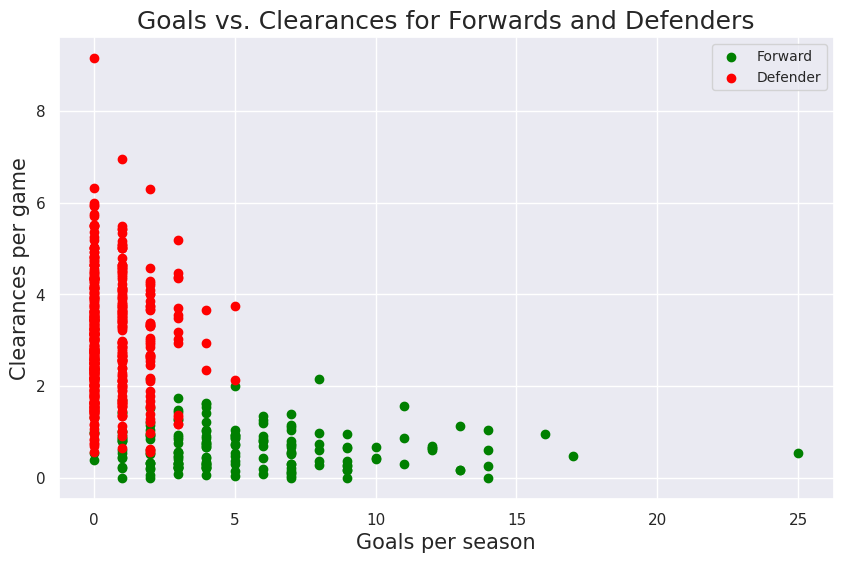

In [3]:
# Set the theme.
sns.set_theme()

# Set the figure size.
plt.figure(figsize = (10, 6))

# Add the forwards to the plot.
plt.scatter(fw_goals, fw_clr, color = "green", label = "Forward")

# Add the non red card players to the plot.
plt.scatter(df_goals, df_clr, color = "red", label = "Defender")
plt.xlabel("Goals per season", fontsize = 15)
plt.ylabel("Clearances per game", fontsize = 15)
plt.legend(fontsize = 10, loc = "upper right")
plt.title("Goals vs. Clearances for Forwards and Defenders", fontsize = 18)
plt.show()

## Hard Voting:

***
**Implementation:**
- Train multiple machine learning models on the same training data. These models can be of different types or variations of the same type with different parameters.
- Once the models are trained, use each of them to make predictions on the test data or new unseen data.
- Aggregate the predictions:
  - For classification tasks, count the class labels predicted by each model and make a prediction by selecting the class label that received the most votes among all models.
  - For regression tasks, make the final prediction by obtaining the average of the predictions made by each model.


**Advantages:**
1. Improved Performance: Hard voting often leads to improved predictive performance compared to individual models, especially when the base models are diverse and complementary.

2. Robustness: Hard voting can improve the overall robustness of the model by reducing the risk of overfitting. Combining multiple models with potentially different biases can help in making more balanced predictions.

3. Simplicity: Hard voting is simple to implement and understand. It doesn't require complex optimization or tuning of hyperparameters compared to some other ensemble methods.

4. Reduction of Bias: In cases where individual models make different types of errors, hard voting can help mitigate bias by aggregating their predictions and making a more balanced decision.


**Disadvantages:**

1. Equal Weighting: Hard voting treats all individual models equally, regardless of their performance. If some models are significantly better than others, hard voting may not exploit this difference effectively and it can get dragged down by bad models.

2. Dependency on Base Models: The performance of hard voting heavily relies on the diversity and quality of the individual base models. If all base models are similar or if they suffer from the same weaknesses, hard voting may not provide significant improvement.

3. Incompatibility with Probabilistic Models: Hard voting is not suitable for models that do not output discrete predictions. If the individual models provide probabilistic outputs, converting them into hard decisions can lead to loss of information.

4. Sensitivity to Noisy Data: Hard voting can be sensitive to noisy or mislabeled data, as it gives equal weight to all predictions, including potentially incorrect ones.
***

***
Let's fit some previously used models to use in the hard voting model. Then, implement the model.
***

In [4]:
# Instantate the classes used to make models.
log_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier()
svm_clf = SVC()

# Implement hard voting.
voting_clf = VotingClassifier(estimators=[("lr", log_clf), ("dt", dt_clf), ("svm", svm_clf)], voting = "hard")

# Implement the Support Vector Model.
svm_clf.fit(train_p, train_r)
svm_y_predict = svm_clf.predict(test_p)
print(f"svm accuracy: {accuracy_score(test_r, svm_y_predict)}")

# Impement Logistic Regression.
log_clf.fit(train_p, train_r)
log_y_predict = log_clf.predict(test_p)
print(f"logistic regression accuracy: {accuracy_score(test_r, log_y_predict)}")

# Implement a Decision Tree.
dt_clf.fit(train_p, train_r)
dt_y_predict = dt_clf.predict(test_p)
print(f"decision tree accuracy: {accuracy_score(test_r, dt_y_predict)}")

# Implement Voting Classifier using the above models.
voting_clf.fit(train_p, train_r)
voting_y_pred = voting_clf.predict(test_p)
print(f"voting classifier accuracy: {accuracy_score(test_r, voting_y_pred)}")

svm accuracy: 0.9346153846153846
logistic regression accuracy: 0.9307692307692308
decision tree accuracy: 0.9038461538461539
voting classifier accuracy: 0.9307692307692308


As we can see, the voting classified agregates the results. This approach will often prevent us from having a truly bad model, and oftentimes will get you something better than the induvidual models.

## Bagging:

***
**Implementation:**
- Split the training dataset into multiple random subsets with replacement (this is called bootstrapping in statistics).
- Train a base model on each bootstrap sample independently.
- Aggregate the predictions of individual models using a voting for classification and averaging for regression.
- Make predictions using each base model on the test dataset by combining the predictions of all base models the same way as above.

**Advantages of Bagging:**
1. It reduces the variance. Bagging reduces overfitting by training multiple models on different subsets of the data and averaging their predictions. This helps in reducing variance and improving generalization.
2. The models are more robust. Bagging improves the robustness of the model by reducing the impact of outliers and noise in the data. Since models are trained on different subsets, they capture different aspects of the data distribution.
3. Bagging often leads to improved predictive performance compared to individual base models, especially when the base models are unstable or prone to overfitting.
4. Training base models in bagging can be parallelized, as each model is trained independently on a subset of the data. This can lead to significant speedup in training time, especially for large datasets.

**Disadvantages of Bagging:**
1. The models are complex. Bagging introduces additional complexity to the model due to the ensemble of multiple base models. This can make the model harder to interpret and analyze.
2. While bagging reduces variance, it does not address bias in the base models. If the base models are biased, bagging may not improve predictive performance.
3. It is not as effective for "stable" models. Bagging works best with unstable models that are sensitive to variations in the training data.
4. Bagging requires training multiple base models, which can be resource-intensive, especially for computationally expensive algorithms or large datasets.
***


***
Let's use the same data as before and see how bagging does!
***

In [5]:
# Create the bagging tree classifier.
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=500,
bootstrap=True, random_state=42)

# Train the model.
bagging_model.fit(train_p, train_r)

# Make predictions.
bag_y_pred = bagging_model.predict(test_p)

# Indentify the accuracy %.
accuracy = accuracy_score(test_r, bag_y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9038461538461539


Bagging get's us an accuracy of about 90%. This does well for this model and will do very well, especially for models with high variance or "bad" outliers even though, in this case, it doesn't perform as strongly compared to other models.

***
We can also look at the classification report.
***

In [6]:
print(f"Bagging Classification Report")
print(classification_report(test_r, bag_y_pred))

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       187
           1       0.85      0.79      0.82        73

    accuracy                           0.90       260
   macro avg       0.89      0.87      0.88       260
weighted avg       0.90      0.90      0.90       260



The higher accuracy for one class over another is interesting, but this is likely due to differently sized classes.

***
Let's also look at the confusion matrix.
***

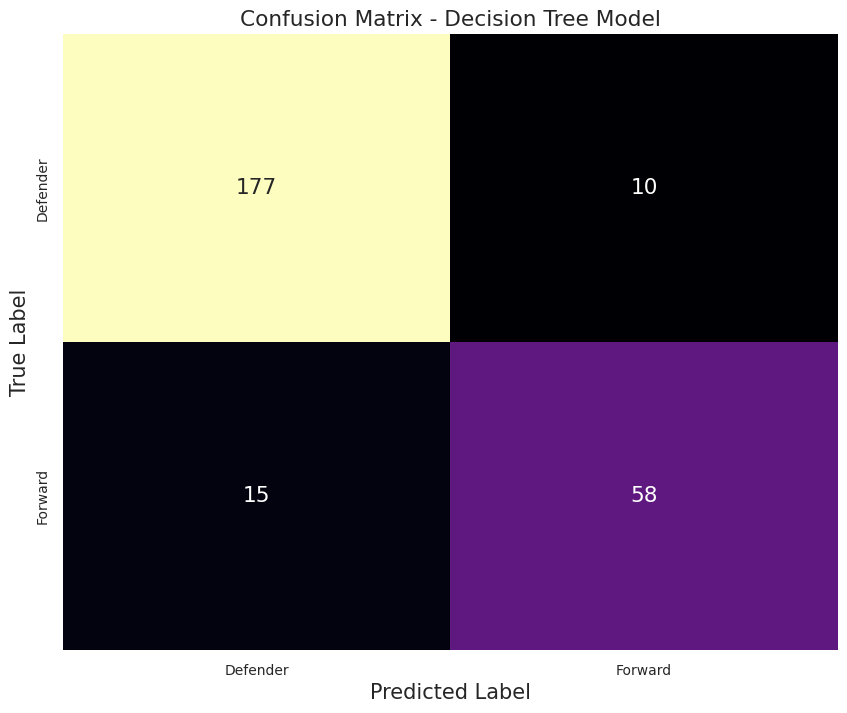

In [9]:
# Confusion matrix
confusion_matrix = metrics.confusion_matrix(test_r, bag_y_pred)

# Set the figure size.
plt.figure(figsize=(10, 8))

# Set the axes.
ax = plt.axes()
sns.set(font_scale=1.3)

# Get a heatmap.
sns.heatmap(confusion_matrix, annot = True, fmt = "g", ax = ax, cmap = "magma", cbar = False)

# Plot the data.
ax.set_title("Confusion Matrix - Decision Tree Model")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(["Defender", "Forward"],rotation = 0, fontsize = 10)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(["Defender", "Forward"], rotation= 90, fontsize = 10)
plt.show()

***
Finally, let's plot the decision regions.
***

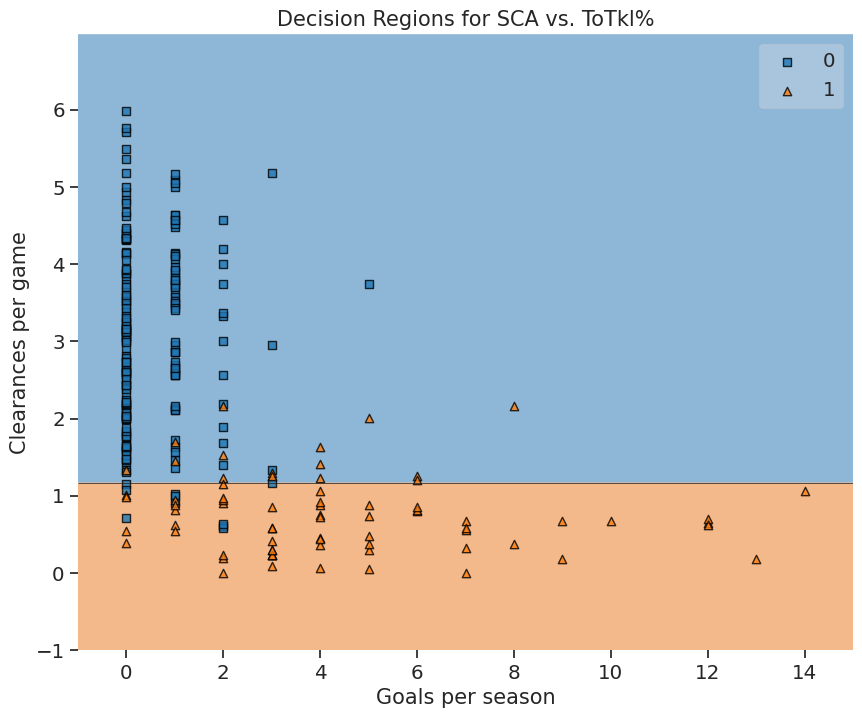

In [10]:
# Set figure size.
plt.figure(figsize = (10, 8))

# Plot points.
plot_decision_regions(test_p, test_r, clf = bagging_model)

# Add axis titles.
plt.title("Decision Regions for SCA vs. ToTkl%", size = 15)
plt.xlabel("Goals per season", fontsize = 15)
plt.ylabel("Clearances per game", fontsize = 15)
plt.grid()
plt.show()

This seems like a reasonable split, although there does seem to be some overlap.

## Random Forests:

***
**Implementation:**
- Get random subsets of the predictors in the training data.
- Choose an appropriate number of trees and other hyperparameters for your Random Forest.
- Initialize a Random Forest for either classification or regression using the random subsets of the data.
- Train the Random Forest on the subsets of training data.
- Use the trained Random Forest to make predictions on new, unseen data.

**Advantages of Random Forests:**
1. Random Forests typically achieve high accuracy in both classification and regression tasks due to their ensemble nature and ability to capture complex relationships in the data.
2. Random Forests are less prone to overfitting compared to individual decision trees, as they aggregate predictions from multiple trees trained on different subsets of the data.
3. Random Forests provide a measure of the importance of each predictor, which can help in predictor selection and understanding the relative importance of different features in predicting the target variable.
4. Random Forests can handle datasets with a large number of features (high dimensionality) efficiently, making them suitable for a wide range of machine learning tasks.

**Disadvantages of Random Forests:**
1. Random Forests are less interpretable compared to individual decision trees, as they consist of multiple trees whose predictions are combined using averaging or voting mechanisms.
2. Random Forests require training multiple decision trees, which can increase computational time and memory usage, especially for large datasets or a large number of trees.
3. Random Forests are often considered as black-box models, making it challenging to understand the underlying decision-making process and the interactions between features.
4. In classification tasks with imbalanced datasets, Random Forests may exhibit a bias towards majority classes, leading to suboptimal performance for minority classes.
***

***
Again, let's use the same dataset, this time to implement random forests.
***

In [11]:
# Implement a random forest object.
forest_clf = RandomForestClassifier(max_depth = 1, n_estimators = 500,bootstrap = True, n_jobs = -1)
forest_clf.fit(train_p, train_r)
forest_y_pred = forest_clf.predict(test_p)

# Indentify the accuracy %.
accuracy = accuracy_score(test_r, forest_y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9038461538461539


***
Let's get the classification report.
***

In [12]:
print(f"Forest Classification Report")
print(classification_report(test_r, forest_y_pred), "\n")

Forest Classification Report
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       187
           1       0.86      0.78      0.82        73

    accuracy                           0.90       260
   macro avg       0.89      0.87      0.88       260
weighted avg       0.90      0.90      0.90       260
 



***
Let's compare this to how the decision tree did.
***

In [13]:
print(f"Decision Tree Classification Report")
print(classification_report(test_r, dt_y_predict), "\n")

Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       187
           1       0.89      0.75      0.81        73

    accuracy                           0.90       260
   macro avg       0.90      0.86      0.87       260
weighted avg       0.90      0.90      0.90       260
 



We continue to get good accuracy here. In fact, in this case they get an equal weighted average. While this is the case in this instance, generally, the random forests will perform better.

## Comparisons:

***
Let's compare all of our different options for ensemble learning.
***

***
Begin by printing out all of the classification reports.
***

In [14]:
# Print Hard Voting Classification Report.
print(f"Hard Voting Classification Report")
print(classification_report(test_r, voting_y_pred), "\n")


# Print Bagging Classification Report.

print(f"Bagging Classification Report")
print(classification_report(test_r, bag_y_pred), "\n")

# Print Random Forest Classification Report.

print(f"Random Forest Classification Report")
print(classification_report(test_r, forest_y_pred), "\n")

Hard Voting Classification Report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       187
           1       0.92      0.82      0.87        73

    accuracy                           0.93       260
   macro avg       0.93      0.90      0.91       260
weighted avg       0.93      0.93      0.93       260
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       187
           1       0.85      0.79      0.82        73

    accuracy                           0.90       260
   macro avg       0.89      0.87      0.88       260
weighted avg       0.90      0.90      0.90       260
 

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       187
           1       0.86      0.78      0.82        73

    accuracy                           0.90       260
   macro avg       0.89 

It looks like, for this set of data, hard voting does the best. Although all three models do a good job.

## Testing the Models With More Predictors:

***
Select more predictors.
***

In [15]:
#Import the dataset.
soccer = pd.read_csv("soccer_stats.csv", encoding='ISO-8859-1', delimiter=';')

# Filter the data such that we are only including players who have player more than 7.5 games worth of time.
soccer = soccer[soccer['90s'] >= 7.5]

# Filter to only include forwards and defenders.
data = soccer[(soccer['Pos'] == 'FW') | (soccer['Pos'] == 'DF')]

# Get the data for our model adding more predictors.
predictors = data[['Age', 'Starts', '90s', 'Shots', 'SoT', 'ShoDist', 'PKatt', 'Assists', 'PPA', 'SCA']].values
response = [[int(val)] for val in (data['Pos'] == 'FW')]
response = np.ravel(response)

# Split the data into training and testing sets.
train_p, test_p, train_r, test_r = train_test_split(predictors, response, test_size = 0.4, random_state = 42)

***
Fit our models with the increased number of predictors.
***

***
Implement the hard voting model.
***

In [16]:
# Instantate the classes used to make models.
log_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier()
svm_clf = SVC()

# Implement hard voting.
voting_clf = VotingClassifier(estimators=[("lr", log_clf), ("dt", dt_clf), ("svm", svm_clf)], voting = "hard")

# Implement the Support Vector Model.
svm_clf.fit(train_p, train_r)
svm_y_predict = svm_clf.predict(test_p)
print(f"svm accuracy: {accuracy_score(test_r, svm_y_predict)}")

# Impement Logistic Regression.
log_clf.fit(train_p, train_r)
log_y_predict = log_clf.predict(test_p)
print(f"logistic regression accuracy: {accuracy_score(test_r, log_y_predict)}")

# Implement a Decision Tree.
dt_clf.fit(train_p, train_r)
dt_y_predict = dt_clf.predict(test_p)
print(f"decision tree accuracy: {accuracy_score(test_r, dt_y_predict)}")

# Implement Voting Classifier using the above models.
voting_clf.fit(train_p, train_r)
voting_y_pred = voting_clf.predict(test_p)
print(f"voting classifier accuracy: {accuracy_score(test_r, voting_y_pred)}")

svm accuracy: 0.8346153846153846
logistic regression accuracy: 0.9576923076923077
decision tree accuracy: 0.9230769230769231
voting classifier accuracy: 0.9384615384615385


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

***
Now do it for bagging.
***

In [17]:
# Create the bagging tree classifier.
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=500,
bootstrap=True, random_state=42)

# Train the model.
bagging_model.fit(train_p, train_r)

# Make predictions.
bag_y_pred = bagging_model.predict(test_p)

# Indentify the accuracy %.
accuracy = accuracy_score(test_r, bag_y_pred)
print(f"Bagging Accuracy: {accuracy}")

Bagging Accuracy: 0.9538461538461539


***
And finally for random forests.
***

In [18]:
# Implement a random forest object.
forest_clf = RandomForestClassifier(max_depth = 1, n_estimators = 500,bootstrap = True, n_jobs = -1)
forest_clf.fit(train_p, train_r)
forest_y_pred = forest_clf.predict(test_p)

# Indentify the accuracy %.
accuracy = accuracy_score(test_r, forest_y_pred)
print(f"Random Forest Accuracy: {accuracy}")

Random Forest Accuracy: 0.9423076923076923


Interestingly, when we use more predictors, the bagging model becomes our best option after the hard voting was best for fewer predictors.

## Feature Selection for Random Forests:

***
One of the advantages of random forests is that you can easily measure feature importance of the data you are working with. Let's try it!
***

In [19]:
names = ['Age', 'Starts', '90s', 'Shots', 'SoT', 'ShoDist', 'PKatt', 'Assists', 'PPA', 'SCA']
for name, score in zip(names, forest_clf.feature_importances_):
    print(name, score)

Age 0.002
Starts 0.004
90s 0.0
Shots 0.306
SoT 0.26
ShoDist 0.03
PKatt 0.124
Assists 0.066
PPA 0.048
SCA 0.16


Some of our predictors seemed to have a large impact like shots, shots on target, and PKatt while others had little or no impact on the data. Using feature selection allows us to interpret the impact of our predictors and decide which ones to use.

## Conclusions:

***
Hard Voting:

- Combining Multiple Models: Hard voting is a simple ensemble technique that combines predictions from multiple base models by selecting the majority class. It can be effective when the base models are diverse and perform well individually.
- Robustness: Hard voting can improve robustness and generalization by aggregating predictions from multiple models, reducing the risk of overfitting and bias. It leverages the wisdom of crowds to make collective decisions.
- Implementation Ease: Hard voting is straightforward to implement and computationally efficient, making it suitable for a wide range of classification tasks. However, it may not always outperform individual models if the base models are highly correlated or if there is significant imbalance in class distributions.

Bagging:

- Reducing Variance: Bagging reduces variance by training multiple base models on bootstrapped subsets of the training data and averaging their predictions. It helps to improve stability and generalization performance, especially for unstable models.
- Diverse Base Models: Bagging works best when base models are diverse and have low correlation. It can be applied to various machine learning algorithms, such as decision trees, neural networks, and support vector machines.
Random Forests:

Random Forests:
- Random Forests are an extension of bagging that further decorrelates base models by introducing randomness during tree construction. This randomness comes from feature subsampling and node splitting criteria.
- Feature Importance: Random Forests provide estimates of feature importance based on the reduction in impurity (e.g., Gini impurity or entropy) achieved by each feature. This can help identify the most influential features in the dataset.
- Robustness to Overfitting: Random Forests are less prone to overfitting compared to individual decision trees, thanks to the ensemble averaging and decorrelation mechanisms. They offer good performance with minimal hyperparameter tuning.
***